# Exploring Network Changes

Packages used:
- [NetworkX](https://networkx.github.io)
- [Matplotlib](https://matplotlib.org)
- [Louvain Community Detection (python-louvain)](https://github.com/taynaud/python-louvain)
- [CluSim: a package for calculating clustering similarity](https://github.com/Hoosier-Clusters/clusim)

In [1]:
import networkx as nx
import community as louvain
from clusim.clustering import Clustering, print_clustering
import clusim.sim as sim
from matplotlib import pyplot as plt

%matplotlib inline

DendroPY not supported.


In [2]:
def membership(d):
    _membership = {}
    for key in d.keys():
        value = d[key]
        _membership[key] = [value]
    return _membership

In [3]:
def summary(graph, communities, clustering):
    print("membership:", membership(communities))
    print("clustering: ", end="")
    print_clustering(clustering)

In [4]:
colors = {
    0: "red",
    1: "blue",
    2: "purple",
    3: "green",
    4: "black"
}

def coloring(membership):
    _coloring = []
    for m in membership:
        _coloring.append(colors[membership[m]])
    return _coloring

In [5]:
def plot(graph, membership):
    plt.tick_params(
        axis='both',
        which='both',
        bottom=False,
        top=False,
        left=False,
        right=False,
        labelbottom=False,
        labeltop=False,
        labelleft=False,
        labelright=False)
    nx.draw_networkx(graph, 
                     pos=nx.spring_layout(graph), 
                     node_color=coloring(membership), 
                     font_color="white")

In [6]:
def delta(z1, z2):
    s1 = set(z1.keys())
    s2 = set(z2.keys())
    added = list(s2 - s1)
    removed = list(s1 - s2)
    print("nodes")
    print("\tadded:   ", added)
    print("\tremoved: ", removed)
    print("links")
    s3 = s1.intersection(s2)
    for n in s3:
        l1 = set(z1[n])
        l2 = set(z2[n])
        print("\tnode",n, "removed", list(l1 - l2), "added", list(l2 - l1))
    if len(added) > 0:
        print("new nodes")
        for n in s2 - s1:
            print("\tnode",n,"connected to", t4[n])

## Time 1
Initial network with 10 nodes. There are two distinctly identifiable groups connected through a single link.

In [7]:
t1 = {
    0: [1,2,3,4],
    1: [0,2,4],
    2: [0,1],
    3: [0,4],
    4: [0,2,3,5],
    5: [4,6,8],
    6: [5,7,8,9],
    7: [6,8],
    8: [5,6,7],
    9: [6]
}

membership: {0: [0], 1: [0], 2: [0], 3: [0], 4: [0], 5: [1], 6: [1], 7: [1], 8: [1], 9: [1]}
clustering: 01234|56789


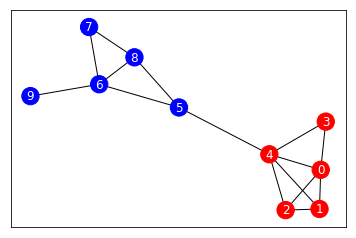

In [8]:
Gt1 = nx.from_dict_of_lists(t1)
Mt1 = louvain.best_partition(Gt1)
Ct1 = Clustering(elm2clu_dict = membership(Mt1))
summary(Gt1, Mt1, Ct1)
plot(Gt1, Mt1)

## Time 2
A third group emerges as node `4` forms new connections to `6` and `9`, and drops all but one previous connection.

In [9]:
t2 = {
    0: [1,2,3,4],
    1: [0,2],
    2: [0,1,3],
    3: [0,2],
    4: [0,6,9],
    5: [6,8],
    6: [4,5,7,8,9],
    7: [6,8],
    8: [5,6,7],
    9: [4,6]
}

In [10]:
delta(t1, t2)

nodes
	added:    []
	removed:  []
links
	node 0 removed [] added []
	node 1 removed [4] added []
	node 2 removed [] added [3]
	node 3 removed [4] added [2]
	node 4 removed [2, 3, 5] added [9, 6]
	node 5 removed [4] added []
	node 6 removed [] added [4]
	node 7 removed [] added []
	node 8 removed [] added []
	node 9 removed [] added [4]


membership: {0: [0], 1: [0], 2: [0], 3: [0], 4: [1], 5: [2], 6: [2], 7: [2], 8: [2], 9: [1]}
clustering: 0123|94|8567


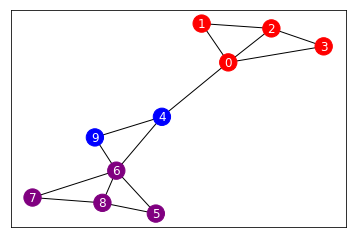

In [11]:
Gt2 = nx.from_dict_of_lists(t2)
Mt2 = louvain.best_partition(Gt2)
Ct2 = Clustering(elm2clu_dict = membership(Mt2))
summary(Gt2, Mt2, Ct2)
plot(Gt2, Mt2)

## Time 3
The third groups begins to expand, with nodes `3` and `6` moving away from their previous groups and forming more links within their own group.

In [12]:
t3 = {
    0: [1,2,4],
    1: [0,2],
    2: [0,1],
    3: [4,6,9],
    4: [0,3,6,9],
    5: [6,7,8],
    6: [3,4,5,9],
    7: [5,8],
    8: [5,7],
    9: [3,4,6]
}

In [13]:
delta(t2, t3)

nodes
	added:    []
	removed:  []
links
	node 0 removed [3] added []
	node 1 removed [] added []
	node 2 removed [3] added []
	node 3 removed [0, 2] added [9, 4, 6]
	node 4 removed [] added [3]
	node 5 removed [] added [7]
	node 6 removed [8, 7] added [3]
	node 7 removed [6] added [5]
	node 8 removed [6] added []
	node 9 removed [] added [3]


membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 6: [1], 7: [2], 8: [2], 9: [1]}
clustering: 012|9346|857


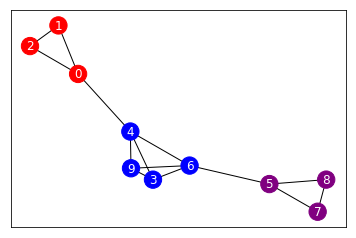

In [14]:
Gt3 = nx.from_dict_of_lists(t3)
Mt3 = louvain.best_partition(Gt3)
Ct3 = Clustering(elm2clu_dict = membership(Mt3))
summary(Gt3, Mt3, Ct3)
plot(Gt3, Mt3)

## Time 4
Two new nodes arrive, `10` and `11`, initially connecting to node `1` and each other.

In [15]:
t4 = {
    0: [1,2,4],
    1: [0,2,10,11],
    2: [0,1],
    3: [4,6,9],
    4: [0,3,6,9],
    5: [6,7,8],
    6: [3,4,5,9],
    7: [5,8],
    8: [5,7],
    9: [3,4,6],
    10: [1,11],
    11: [1,10]
}

In [16]:
delta(t3, t4)

nodes
	added:    [10, 11]
	removed:  []
links
	node 0 removed [] added []
	node 1 removed [] added [10, 11]
	node 2 removed [] added []
	node 3 removed [] added []
	node 4 removed [] added []
	node 5 removed [] added []
	node 6 removed [] added []
	node 7 removed [] added []
	node 8 removed [] added []
	node 9 removed [] added []
new nodes
	node 10 connected to [1, 11]
	node 11 connected to [1, 10]


In [17]:
Gt4 = nx.from_dict_of_lists(t4)
Mt4 = louvain.best_partition(Gt4)
Ct4 = Clustering(elm2clu_dict = membership(Mt4))
summary(Gt4, Mt4, Ct4)

membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 6: [1], 7: [2], 8: [2], 9: [1], 10: [0], 11: [0]}
clustering: 0121011|9346|857


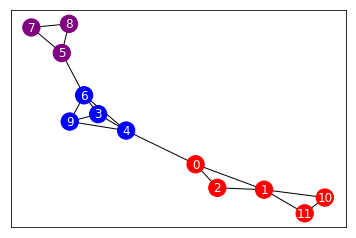

In [18]:
plot(Gt4, Mt4)

## Time 5
A fourth group emerges with three nodes: `8`, `10`, and `11`. Additionally, with a few more link additions and removals the other groups also balance out to three nodes. 

In [19]:
t5 = {
    0: [1,2,4],
    1: [0,2,10,11],
    2: [0,1],
    3: [4,9],
    4: [0,3,6,9],
    5: [6,7,8],
    6: [4,5,7,9],
    7: [5,6],
    8: [5,10,11],
    9: [3,4,6],
    10: [1,8,11],
    11: [1,8,10]
}

In [20]:
delta(t4, t5)

nodes
	added:    []
	removed:  []
links
	node 0 removed [] added []
	node 1 removed [] added []
	node 2 removed [] added []
	node 3 removed [6] added []
	node 4 removed [] added []
	node 5 removed [] added []
	node 6 removed [3] added [7]
	node 7 removed [8] added [6]
	node 8 removed [7] added [10, 11]
	node 9 removed [] added []
	node 10 removed [] added [8]
	node 11 removed [] added [8]


membership: {0: [0], 1: [0], 2: [0], 3: [1], 4: [1], 5: [2], 6: [2], 7: [2], 8: [3], 9: [1], 10: [3], 11: [3]}
clustering: 012|934|567|81011


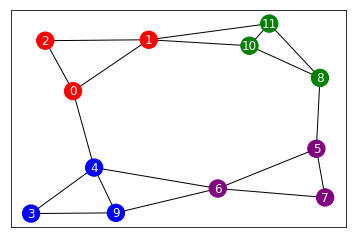

In [21]:
Gt5 = nx.from_dict_of_lists(t5)
Mt5 = louvain.best_partition(Gt5)
Ct5 = Clustering(elm2clu_dict = membership(Mt5))
summary(Gt5, Mt5, Ct5)
plot(Gt5, Mt5)

## Comparing Time 1 and Time 2

In [22]:
elementScores, relabeled_elements = sim.element_sim_elscore(Ct1, Ct2, alpha = 0.9)

In [23]:
print(relabeled_elements)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}


In [24]:
print("{0:6s}  {1:6s}".format("Node", "Score"))
print("------  ------")
for e in relabeled_elements:
    loc = relabeled_elements[e]
    print("{0:6d}  {1:2.3f}".format(e,elementScores[loc]))

Node    Score 
------  ------
     0  0.800
     1  0.800
     2  0.800
     3  0.800
     4  0.200
     5  0.800
     6  0.800
     7  0.800
     8  0.800
     9  0.200


In [25]:
cont_table = sim.contingency_table(Ct1, Ct2)

In [26]:
print(cont_table)

[[4, 1, 0], [0, 1, 4]]


In [27]:
N11, N10, N01, N00 = sim.count_pairwise_cooccurence(Ct1, Ct2)
print(N11,
        "element pairs assigned to the same clusters in both clusterings")
print(N10,
        "element pairs assigned to the same clusters in clustering1, but "
        "different clusters in clustering2")
print(N01, "element pairs assigned to different clusters in "
               "clustering1, but the same clusters in clustering2")
print(N00, "element pairs assigned to different clusters in both "
               "clusterings")

12.0 element pairs assigned to the same clusters in both clusterings
8.0 element pairs assigned to the same clusters in clustering1, but different clusters in clustering2
1.0 element pairs assigned to different clusters in clustering1, but the same clusters in clustering2
24.0 element pairs assigned to different clusters in both clusterings
